# Import Libraries

In [14]:
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd
import math 
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
import keras

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualisations
%matplotlib inline
sns.set_style( 'white' )

In [17]:
df = pd.read_csv('train.csv')

In [18]:
labels = pd.read_csv('labels.csv')

# Exploratory Data Analysis


In [19]:
df.head()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,FiO2,GCS,Gender,Glucose,HCO3,HCT,HR,Height,ICUType,K,Lactate,MAP,MechVent,Mg,NIDiasABP,NIMAP,NISysABP,Na,PaCO2,PaO2,Platelets,RecordID,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
0,77.0,31.0,46.0,54,2.973333,10.500000,0.7,154.0,0.750000,58.795833,0.526667,14.923077,0,160.000000,27.000000,32.500000,70.810811,170.2,4,4.20,1.900000,78.934007,1,1.700000,50.147059,71.559118,114.382353,136.500000,39.666667,138.871212,203.000000,132539.0,17.428571,97.250000,116.891892,37.357143,2.1,0.14,171.052632,10.300000,80.060976,7.387273
1,77.0,31.0,46.0,76,2.973333,18.333333,0.7,154.0,1.100000,58.897059,0.560000,13.333333,1,125.500000,22.333333,28.655556,80.794118,175.3,2,3.90,1.900000,76.940299,1,2.300000,56.714286,75.308571,112.500000,137.000000,38.857143,210.142857,178.600000,132540.0,19.000000,96.833333,113.411765,36.939130,2.1,0.14,151.560976,11.266667,80.670588,7.395000
2,116.0,83.0,199.5,44,2.500000,4.666667,2.9,154.0,0.333333,67.125000,0.500000,5.923077,0,134.333333,25.000000,28.460000,83.759259,170.2,3,4.26,1.366667,90.437500,1,1.720000,79.000000,96.751316,132.263158,138.333333,35.500000,134.500000,89.666667,132541.0,19.000000,95.000000,125.687500,37.800000,2.1,0.14,124.951220,4.700000,56.700000,7.495000
3,105.0,12.0,15.0,68,4.400000,17.666667,0.2,154.0,0.766667,58.795833,0.526667,14.944444,1,117.333333,27.666667,37.442857,70.983333,180.3,3,4.00,1.900000,78.934007,1,2.033333,65.051724,83.885517,121.551724,139.333333,39.666667,138.871212,330.000000,132543.0,15.457627,97.250000,116.891892,36.223077,2.1,0.14,545.833333,9.400000,84.600000,7.387273
4,77.0,31.0,46.0,88,3.300000,35.000000,0.7,154.0,1.000000,58.795833,0.526667,15.000000,0,102.500000,19.000000,29.550000,74.958333,170.2,3,4.32,1.900000,78.934007,1,1.550000,45.720930,74.946512,133.395349,139.500000,39.666667,138.871212,103.000000,132545.0,19.166667,97.250000,116.891892,36.880000,2.1,0.14,62.131579,4.300000,80.060976,7.387273


In [20]:
df.columns

Index(['ALP', 'ALT', 'AST', 'Age', 'Albumin', 'BUN', 'Bilirubin',
       'Cholesterol', 'Creatinine', 'DiasABP', 'FiO2', 'GCS', 'Gender',
       'Glucose', 'HCO3', 'HCT', 'HR', 'Height', 'ICUType', 'K', 'Lactate',
       'MAP', 'MechVent', 'Mg', 'NIDiasABP', 'NIMAP', 'NISysABP', 'Na',
       'PaCO2', 'PaO2', 'Platelets', 'RecordID', 'RespRate', 'SaO2', 'SysABP',
       'Temp', 'TroponinI', 'TroponinT', 'Urine', 'WBC', 'Weight', 'pH'],
      dtype='object')

In [21]:
df.shape

(3999, 42)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 42 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ALP          3999 non-null   float64
 1   ALT          3999 non-null   float64
 2   AST          3999 non-null   float64
 3   Age          3999 non-null   int64  
 4   Albumin      3999 non-null   float64
 5   BUN          3999 non-null   float64
 6   Bilirubin    3999 non-null   float64
 7   Cholesterol  3999 non-null   float64
 8   Creatinine   3999 non-null   float64
 9   DiasABP      3999 non-null   float64
 10  FiO2         3999 non-null   float64
 11  GCS          3999 non-null   float64
 12  Gender       3999 non-null   int64  
 13  Glucose      3999 non-null   float64
 14  HCO3         3999 non-null   float64
 15  HCT          3999 non-null   float64
 16  HR           3999 non-null   float64
 17  Height       3999 non-null   float64
 18  ICUType      3999 non-null   int64  
 19  K     

In [23]:
df.describe()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,FiO2,GCS,Gender,Glucose,HCO3,HCT,HR,Height,ICUType,K,Lactate,MAP,MechVent,Mg,NIDiasABP,NIMAP,NISysABP,Na,PaCO2,PaO2,Platelets,RecordID,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.0,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,89.259978,91.709903,130.219258,64.247562,2.975942,25.449665,1.216527,152.403601,1.363130,59.262693,106.243369,11.615267,35.335834,137.087758,23.674534,31.424746,87.122729,169.945036,36.175544,4.136466,2.145524,80.449634,1.0,2.017580,57.209247,76.101723,117.045472,138.861354,40.255572,180.324554,204.987649,137605.348587,19.223967,96.940907,118.145550,36.956291,2.368702,0.337362,133.363074,12.521058,82.799384,7.488870
std,70.397850,427.290858,590.482153,17.563142,0.404440,20.586576,2.961385,13.891279,1.406947,9.080069,3858.226228,3.235578,2198.997715,39.938339,4.178864,4.510583,14.550804,14.805887,2113.064930,0.522405,1.792110,11.656091,0.0,0.304457,10.925580,11.306395,18.226100,4.053181,7.012932,2188.040909,102.494600,2922.264561,2.074830,2.296143,16.540816,0.727382,2.418656,1.276145,117.304284,6.466063,23.117431,2.986373
min,12.000000,3.000000,6.000000,15.000000,1.100000,2.250000,0.100000,0.000000,0.200000,0.000000,0.276000,1.000000,0.000000,49.000000,9.125000,16.600000,3.000000,1.800000,1.000000,2.500000,0.400000,2.000000,1.0,1.100000,0.000000,0.000000,0.000000,111.500000,16.000000,26.000000,8.200000,132539.000000,10.543478,38.800000,0.000000,21.644615,0.300000,0.010000,0.000000,0.100000,3.500000,6.311667
25%,77.000000,31.000000,46.000000,52.500000,2.973333,13.000000,0.700000,154.000000,0.700000,55.843712,0.500000,9.307692,0.000000,112.250000,21.333333,28.300000,77.270209,170.200000,2.000000,3.800000,1.784524,75.481103,1.0,1.840000,50.492031,69.111667,105.812937,136.500000,37.333333,116.900000,137.450000,135078.000000,19.000000,97.230769,111.099359,36.614286,2.100000,0.125000,74.044118,8.900000,68.201064,7.364142
50%,77.000000,31.000000,46.000000,67.000000,2.973333,19.000000,0.700000,154.000000,0.933333,58.795833,0.526667,12.428571,1.000000,129.800000,23.666667,30.630952,86.274510,170.200000,3.000000,4.075000,1.900000,78.934007,1.0,2.000000,56.280788,74.751250,115.366987,139.000000,39.666667,138.871212,187.200000,137589.000000,19.000000,97.250000,116.891892,36.968750,2.100000,0.140000,111.032258,11.466667,80.060976,7.387273
75%,82.000000,32.250000,49.000000,78.000000,3.000000,30.000000,0.700000,154.000000,1.366667,62.210006,0.562500,14.750000,1.000000,152.250000,26.000000,34.017143,96.473258,170.200000,4.000000,4.400000,2.000000,83.204416,1.0,2.150000,63.166667,81.739195,126.645833,141.000000,42.000000,163.732143,246.900000,140099.500000,19.290323,97.250000,123.504098,37.364401,2.100000,0.140000,160.419207,14.950000,93.040476,7.407500
max,1472.333333,9143.428571,15680.000000,90.000000,5.300000,170.833333,46.366667,330.000000,16.457143,106.666667,141264.000000,15.000000,139060.000000,467.333333,96.000000,61.050000,137.842105,431.800000,133628.000000,16.000000,85.000000,265.000000,1.0,6.900000,107.500000,132.540000,234.000000,164.533333,158.000000,138477.000000,925.666667,142673.000000,39.655172,100.000000,181.725000,39.748980,49.200000,24.040000,3082.380952,137.233333,300.000000,128.532500


In [24]:
labels.head()

,In-hospital_death
0,0
1,0
2,0
3,0
4,0


In [25]:
labels.value_counts()

In-hospital_death
0                    3445
1                     554
dtype: int64

In [26]:
#one hot encoding
temp = []
for i in labels['In-hospital_death']:
  if i==0:
    temp.append([1,0])
  else:
    temp.append([0,1])

#array에는 추가하지 못하므로 다 추가한 다음 array로 바꿔준다.
temp = np.array(temp)

In [27]:
temp.shape

(3999, 2)

In [28]:
new = pd.concat([df, labels], axis = 1)
new.shape

(3999, 43)

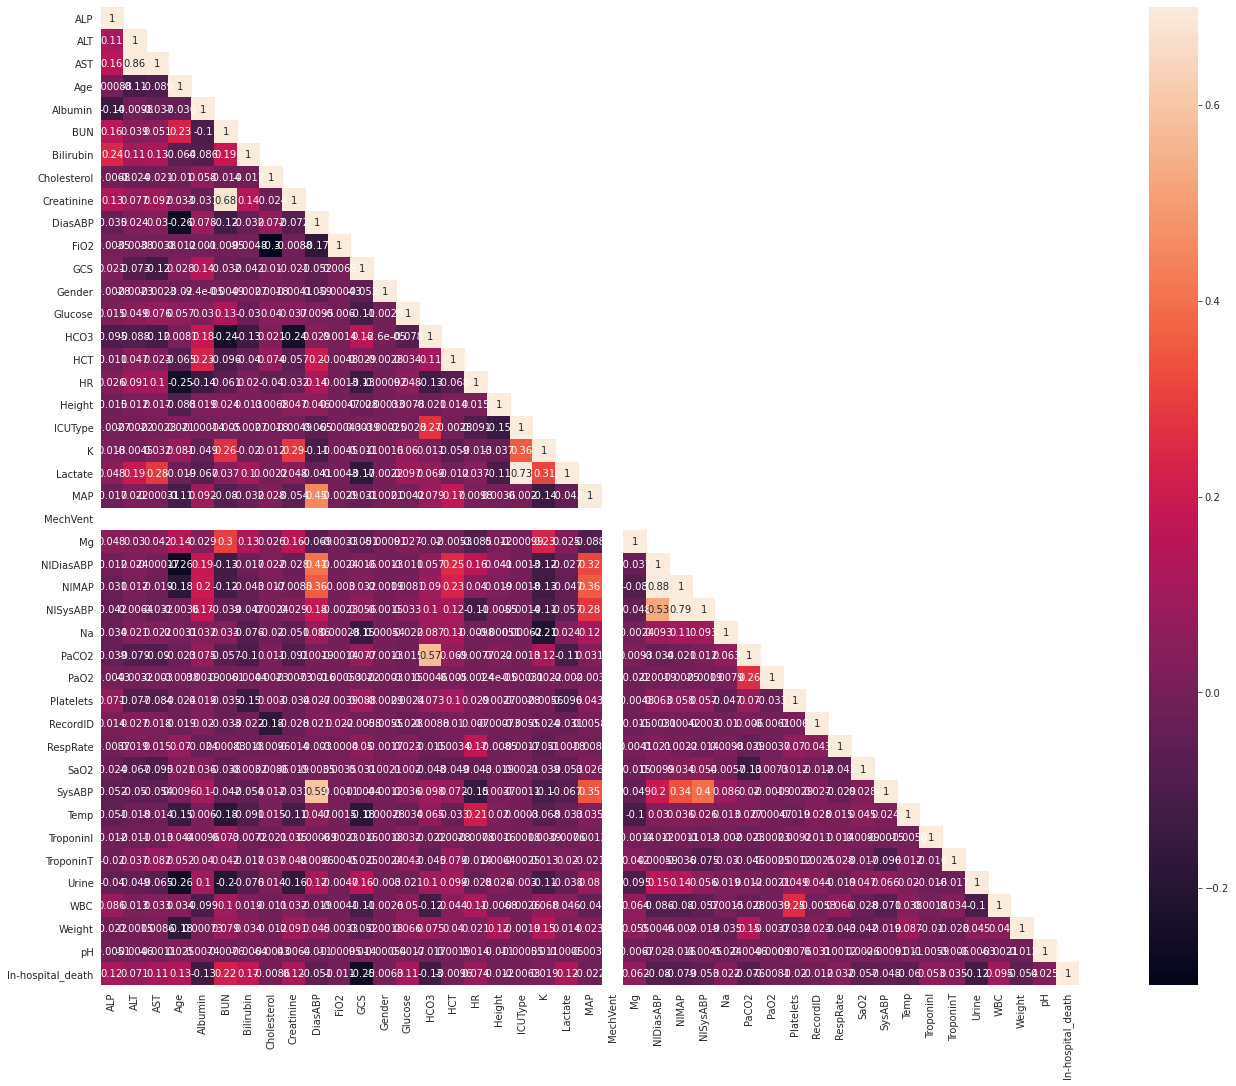

In [33]:
correlation_map = new.corr()
obj = np.array(correlation_map)
#왼쪽 아래 삼각형 만들기
obj[np.tril_indices_from(obj)] = False
plt.figure(figsize=(25,18))
sns.heatmap(correlation_map, mask = obj, vmax = .7, square=True, annot = True)

In [35]:
new.drop(['In-hospital_death','Gender','Cholesterol','HCT','ICUType','Height'], axis = 1, inplace=True)

In [36]:
df = new

# Scaling Data

In [37]:
from sklearn.preprocessing import MinMaxScaler
#최대, 최소 값이 1,0이 되도록 설정
scaler = MinMaxScaler(feature_range = (0,1))
df = scaler.fit_transform(df)

In [38]:
x = df
y = temp
print(x.shape, y.shape)

(3999, 37) (3999, 2)


# **Splitting Dataset**

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [40]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3199, 37) (800, 37) (3199, 2) (800, 2)


# Deep Learning Model

## Import necessary files

In [42]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.optimizers import RMSprop, Adam

## Building ANN model

In [43]:
model = Sequential()

#첫 번째 인자 : 뉴런의 수, 두 번째 인자 : 입력 데이터의 개수, 세번째 인자 : 활성함수 
#relu는 은닉층, sigmond는 0/1(binary)
model.add(Dense(64, input_dim = x_train.shape[1], activation='relu' ))
model.add(Dense(128, activation='relu'))
model.add(Dense(196, activation='relu'))
model.add(Dense(196, activation='relu'))

model.add(BatchNormalization())

model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(optimizer = Adam(lr = 0.0005), loss = 'binary_crossentropy', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                2432      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 196)               25284     
_________________________________________________________________
dense_3 (Dense)              (None, 196)               38612     
_________________________________________________________________
batch_normalization (BatchNo (None, 196)               784       
_________________________________________________________________
dense_4 (Dense)              (None, 256)               50432     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 5

## Fitting the model

In [44]:
#epochs는 몇 번 반복학습을 할 것인지, batch_size는 가중치 갱신을 몇 개의 데이터를 하고 할 것인지
history = model.fit(x_train, y_train, epochs=15, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/15
25/25 [==============================] - 19s 37ms/step - loss: 0.6692 - accuracy: 0.5314 - val_loss: 0.5245 - val_accuracy: 0.8675
Epoch 2/15
25/25 [==============================] - 0s 10ms/step - loss: 0.3776 - accuracy: 0.8620 - val_loss: 0.5207 - val_accuracy: 0.8675
Epoch 3/15
25/25 [==============================] - 0s 9ms/step - loss: 0.3312 - accuracy: 0.8727 - val_loss: 0.5167 - val_accuracy: 0.8675
Epoch 4/15
25/25 [==============================] - 0s 10ms/step - loss: 0.3209 - accuracy: 0.8668 - val_loss: 0.5096 - val_accuracy: 0.8675
Epoch 5/15
25/25 [==============================] - 0s 9ms/step - loss: 0.3075 - accuracy: 0.8666 - val_loss: 0.4729 - val_accuracy: 0.8675
Epoch 6/15
25/25 [==============================] - 0s 9ms/step - loss: 0.3008 - accuracy: 0.8753 - val_loss: 0.4766 - val_accuracy: 0.8675
Epoch 7/15
25/25 [==============================] - 0s 9ms/step - loss: 0.2848 - accuracy: 0.8846 - val_loss: 0.4695 - val_accuracy: 0.8675
Epoch 8/15
25/25

## Evaluating Performance using Accuracy, Loss and Conusion matrix

In [45]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


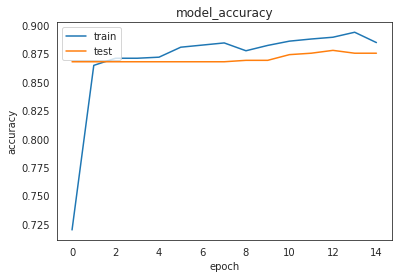

In [48]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

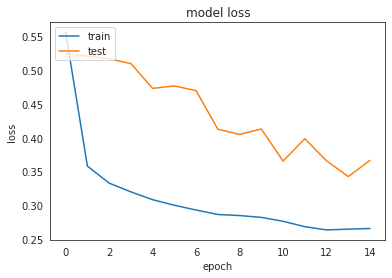

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [50]:
from sklearn.metrics import confusion_matrix

pred = model.predict(x_test)
pred = np.argmax(pred, axis =1)
y_true = np.argmax(y_test, axis = 1)
print(accuracy_score(y_true, pred))

0.875


In [51]:
cnf_matrix = confusion_matrix(y_true, pred)
print(cnf_matrix)

[[692   2]
 [ 98   8]]


In [52]:
print(accuracy_score(y_true, pred))

0.875


## Using other model

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [57]:
a = LogisticRegression(random_state=7)
b = DecisionTreeClassifier()
c = MLPClassifier(solver = 'lbfgs', alpha = 1e-5, hidden_layer_sizes=(25,), random_state=1)
d = SVC(probability=True)
e = RandomForestClassifier()

In [64]:
y = labels
y

,In-hospital_death
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,1


In [65]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [66]:
a.fit(x_train, y_train)
b.fit(x_train, y_train)
c.fit(x_train, y_train)
d.fit(x_train, y_train)
e.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [67]:
preda = a.predict(x_test)
predb = b.predict(x_test)
predc = c.predict(x_test)
predd = d.predict(x_test)
prede = e.predict(x_test)

In [69]:
print("LogisticRegression",accuracy_score(preda, y_test))
print("DecisionTreeClassifier",accuracy_score(predb, y_test))
print("MLPClassifier",accuracy_score(predc, y_test))
print("SVC",accuracy_score(predd, y_test))
print("RandomForestClassifier",accuracy_score(prede, y_test))

LogisticRegression 0.885
DecisionTreeClassifier 0.81375
MLPClassifier 0.87625
SVC 0.87625
RandomForestClassifier 0.89375
